<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [3]:
!pip install sqlalchemy==1.3.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 85.2 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp311-cp311-linux_x86_64.whl size=1142923 sha256=9f491b671570c1d786d79ab08339162caf1464d0eca8e7cd083bd7c38f069b20
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/3a/7c/1e/12404784a68083eb969f877a1808a1847bab897684b56ddc55
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterhub 4.1.5 requires SQLAlchemy>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [4]:
!pip install ipython-sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [5]:
%load_ext sql

In [6]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [7]:
!pip install -q pandas

In [8]:
%sql sqlite:///my_data1.db

In [9]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

**Note:This below code is added to remove blank rows from table**


In [10]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [11]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [12]:
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [13]:
%sql SELECT * FROM SPACEXTABLE WHERE "Launch_Site" LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [14]:
%sql SELECT SUM("PAYLOAD_MASS__KG_") AS Total_Payload_Mass FROM SPACEXTABLE WHERE "Customer" LIKE '%NASA (CRS)%';

 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
48213


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [15]:
%sql SELECT AVG("PAYLOAD_MASS__KG_") AS Avg_Payload_Mass FROM SPACEXTABLE WHERE "Booster_Version" = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


Avg_Payload_Mass
2928.4


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [16]:
%sql SELECT MIN("Date") AS First_Successful_Landing_Date FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


First_Successful_Landing_Date
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [17]:
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (drone ship)' AND "PAYLOAD_MASS__KG_" BETWEEN 4000 AND 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### Task 7




##### List the total number of successful and failure mission outcomes


In [18]:
%sql SELECT "Landing_Outcome", COUNT(*) AS Count FROM SPACEXTABLE GROUP BY "Landing_Outcome";

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count
Controlled (ocean),5
Failure,3
Failure (drone ship),5
Failure (parachute),2
No attempt,21
No attempt,1
Precluded (drone ship),1
Success,38
Success (drone ship),14
Success (ground pad),9


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [19]:
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "PAYLOAD_MASS__KG_" = (SELECT MAX("PAYLOAD_MASS__KG_") FROM SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [20]:
%sql SELECT strftime('%m', "Date") AS Month, "Landing_Outcome", "Booster_Version", "Launch_Site" FROM SPACEXTABLE WHERE strftime('%Y', "Date") = '2015' AND "Landing_Outcome" LIKE 'Failure (drone ship)';

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [21]:
%sql SELECT strftime('%m', "Date") AS Month, "Landing_Outcome", "Booster_Version", "Launch_Site" FROM SPACEXTABLE WHERE strftime('%Y', "Date") = '2015' AND "Landing_Outcome" LIKE 'Failure (drone ship)';

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 99.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.3 MB/s eta 0:00:00


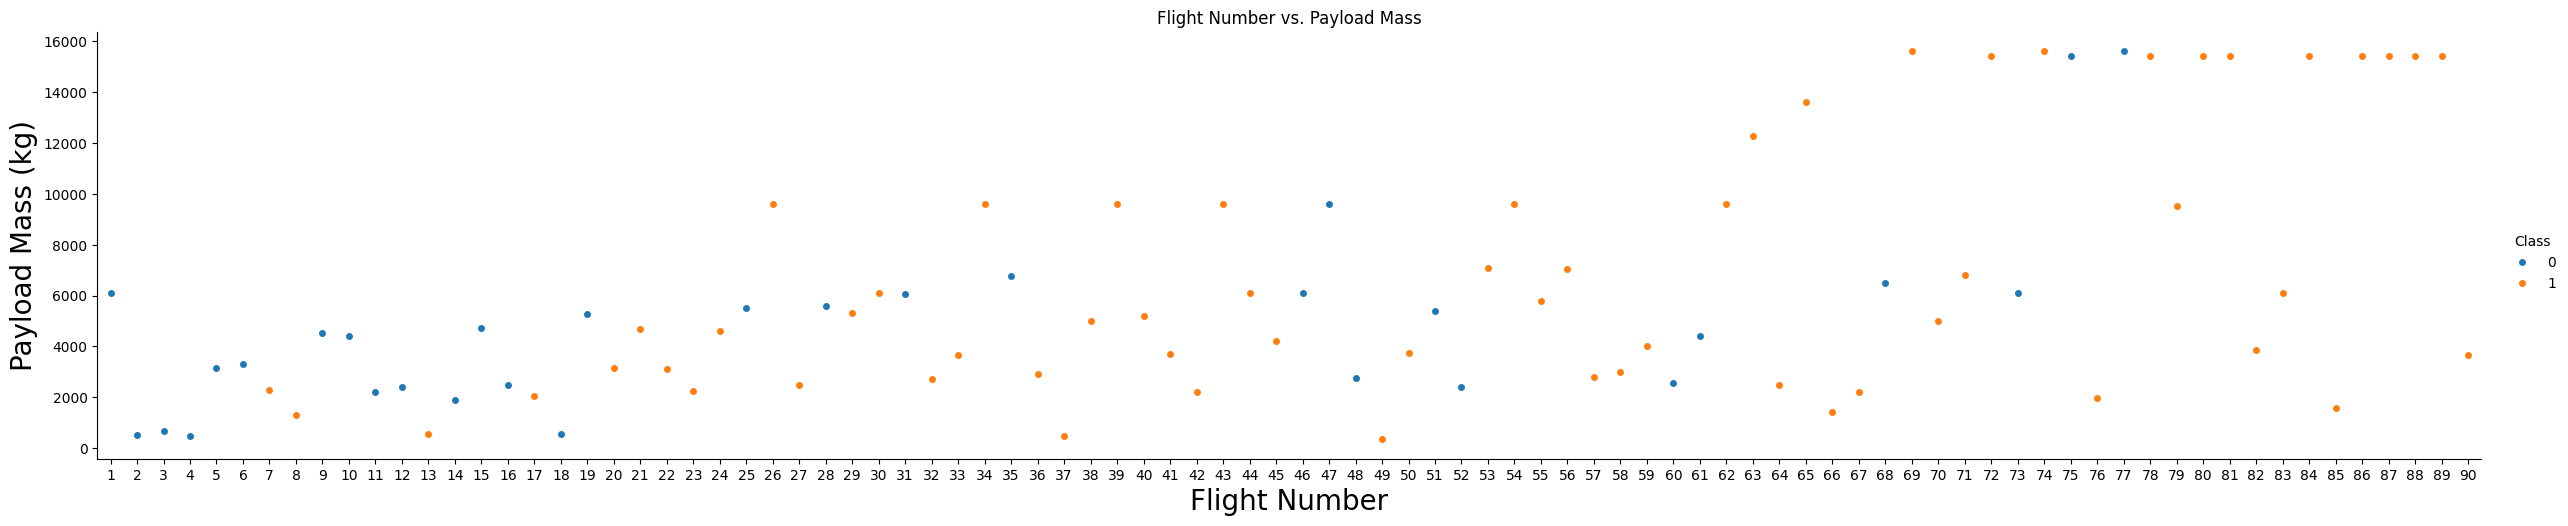

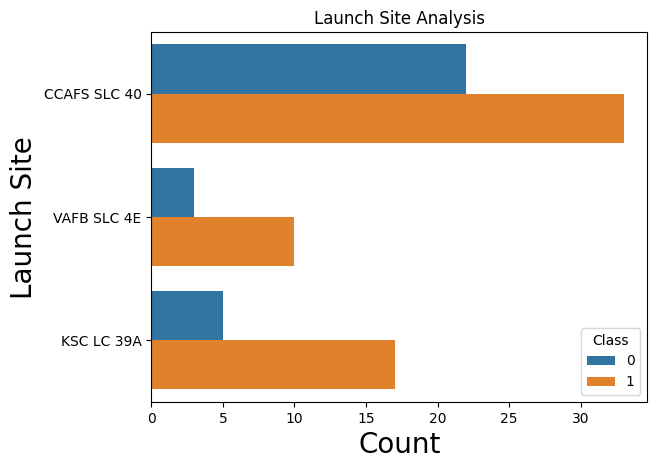

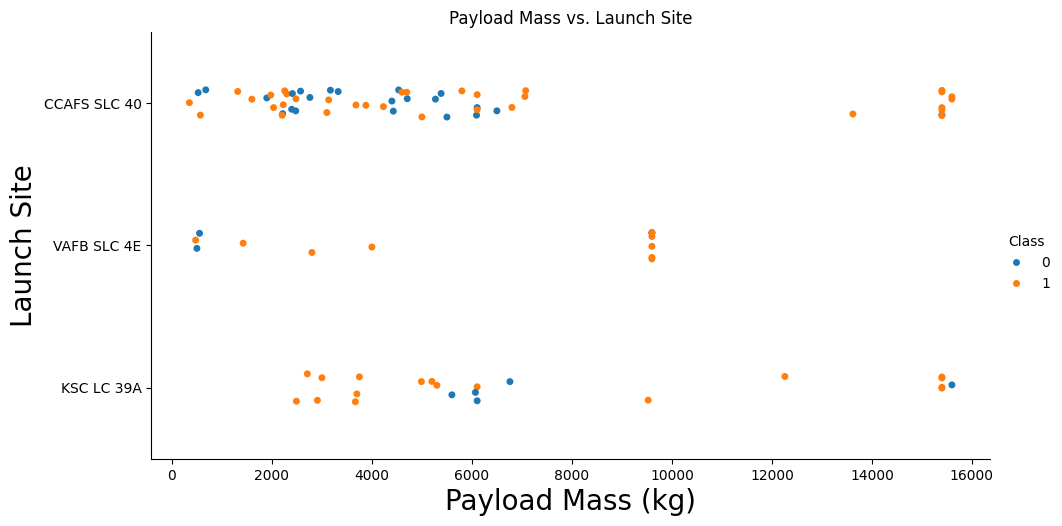

In [26]:
# Install the necessary libraries
!pip install matplotlib seaborn

# Import the libraries
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataframe
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

# Flight Number vs. Payload Mass
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Flight Number vs. Payload Mass")
plt.show()

# Launch Site Analysis
sns.countplot(y="LaunchSite", hue="Class", data=data)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Launch Site Analysis")
plt.show()

# Payload Mass vs. Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=data, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Payload Mass vs. Launch Site")
plt.show()


### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2024-07-10 | 1.1 |Anita Verma | Changed Version|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
